In [3]:
#Κάνουμε import όλες τις βιβλιοθήκες που θα χρησιμοποιήσουμε

import pandas as pd                                                          
import matplotlib.pyplot as plt                                              
import seaborn as sns                                                       
import numpy as np                                             
from sklearn.linear_model import *
from sklearn.model_selection import *
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import math

# Ανεβάζουμε το dataset μας και το προεπεξεργαζόμαστε

In [4]:
train_df = pd.read_csv("Training.csv")                                  

train_df                           

,prognosis,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Βρίσκουμε ποια είναι τα συμπτώματα του dataset, οι στήλες μας δηλαδή (features)

training_inputs = train_df.columns[1:]                      
in_features = len(training_inputs)              
training_inputs, in_features  

(Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
        'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
        'ulcers_on_tongue',
        ...
        'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
        'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
        'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
       dtype='object', length=132), 132)

In [6]:
#Βρίσκουμε ποιες είναι οι ασθένεις/προβλήματα υγείας και τα κωδικοποιούμε με αριθμούς

labels = dict(enumerate(train_df['prognosis'].astype('category').cat.categories))
labels

{0: '(vertigo) Paroymsal  Positional Vertigo',
 1: 'AIDS',
 2: 'Acne',
 3: 'Alcoholic hepatitis',
 4: 'Allergy',
 5: 'Arthritis',
 6: 'Bronchial Asthma',
 7: 'Cervical spondylosis',
 8: 'Chicken pox',
 9: 'Chronic cholestasis',
 10: 'Common Cold',
 11: 'Dengue',
 12: 'Diabetes ',
 13: 'Dimorphic hemmorhoids(piles)',
 14: 'Drug Reaction',
 15: 'Fungal infection',
 16: 'GERD',
 17: 'Gastroenteritis',
 18: 'Heart attack',
 19: 'Hepatitis B',
 20: 'Hepatitis C',
 21: 'Hepatitis D',
 22: 'Hepatitis E',
 23: 'Hypertension ',
 24: 'Hyperthyroidism',
 25: 'Hypoglycemia',
 26: 'Hypothyroidism',
 27: 'Impetigo',
 28: 'Jaundice',
 29: 'Malaria',
 30: 'Migraine',
 31: 'Osteoarthristis',
 32: 'Paralysis (brain hemorrhage)',
 33: 'Peptic ulcer diseae',
 34: 'Pneumonia',
 35: 'Psoriasis',
 36: 'Tuberculosis',
 37: 'Typhoid',
 38: 'Urinary tract infection',
 39: 'Varicose veins',
 40: 'hepatitis A'}

In [7]:
#Βρίσκουμε την συσχέτιση των χαρακτηριστικών μεταξύ τους 

train_df.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
chills,-0.175905,-0.029324,-0.065917,0.446238,0.295332,1.000000,-0.004688,-0.095646,-0.095646,-0.065917,...,-0.065917,-0.065917,-0.065917,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765
joint_pain,-0.160650,0.171134,-0.060200,-0.087351,-0.060200,-0.004688,1.000000,-0.087351,-0.087351,-0.060200,...,-0.060200,-0.060200,-0.060200,0.359845,0.359845,0.359845,0.359845,-0.061889,-0.061889,-0.061889
stomach_pain,0.202850,0.161784,-0.032566,-0.047254,-0.032566,-0.095646,-0.087351,1.000000,0.433917,0.649078,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
acidity,-0.086906,-0.094786,-0.032566,-0.047254,-0.032566,-0.095646,-0.087351,0.433917,1.000000,0.608981,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
ulcers_on_tongue,-0.059893,-0.065324,-0.022444,-0.032566,-0.022444,-0.065917,-0.060200,0.649078,0.608981,1.000000,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073


In [8]:
#Και εδώ το παρουσιάζουμε σε heatmap

plt.figure(figsize=(in_features,in_features))
sns.heatmap(train_df.corr(), cmap='viridis')
plt.title('Correlation heatmap',size=25)
plt.show()

In [9]:
#Επιλέγουμε το όριο που θέλουμε και βρίσκουμε τις στήλες/χαρακτηριστικά/συμπτώματα που έχουν πολύ μεγάλη αυτοσυσχέτιση,
#τις οποίες στην συνέχεια σβήνουμε ώστε να παραχτεί το τροποποιημένο μας dataset

threshold = 0.8

cor_matrix = train_df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
print(to_drop)

train_df.drop(to_drop, axis=1, inplace=True)

train_df

['cold_hands_and_feets', 'patches_in_throat', 'dehydration', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'foul_smell_of urine', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'blackheads', 'scurring', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nai

,prognosis,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,red_spots_over_body,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,blood_in_sputum,pus_filled_pimples,skin_peeling,blister
0,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Βρίσκουμε ποια είναι τα συμπτώματα του dataset, οι στήλες μας δηλαδή (features) ξανά

training_inputs = train_df.columns[1:]                      
in_features = len(training_inputs)              
training_inputs, in_features  

(Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
        'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
        'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
        'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety',
        'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
        'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
        'breathlessness', 'sweating', 'indigestion', 'headache',
        'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite',
        'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain',
        'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
        'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
        'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
        'phlegm', 'throat_irritation', 'chest_pain', 'weakness_in_limbs',
        'fast_heart_rate', 'pain_during_bowel_movements',

In [11]:
#Βρίσκουμε την συσχέτιση των χαρακτηριστικών μεταξύ τους ξανά

train_df.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,red_spots_over_body,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,blood_in_sputum,pus_filled_pimples,skin_peeling,blister
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,0.226497,-0.088129,-0.061573,-0.063212,-0.061573,-0.061573,-0.063212,-0.059893,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.481206,-0.096120,-0.067156,-0.068944,-0.067156,-0.067156,-0.068944,0.320859,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.033478,-0.033025,-0.023073,-0.023687,-0.023073,-0.023073,-0.023687,-0.022444,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.048577,-0.047919,-0.033480,-0.034371,-0.033480,-0.033480,-0.034371,-0.032566,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.033478,-0.033025,-0.023073,-0.023687,-0.023073,-0.023073,-0.023687,-0.022444,-0.023073,-0.023073
chills,-0.175905,-0.029324,-0.065917,0.446238,0.295332,1.000000,-0.004688,-0.095646,-0.095646,-0.065917,...,0.181462,-0.096992,-0.067765,0.337908,-0.067765,-0.067765,0.337908,-0.065917,-0.067765,-0.067765
joint_pain,-0.160650,0.171134,-0.060200,-0.087351,-0.060200,-0.004688,1.000000,-0.087351,-0.087351,-0.060200,...,0.208312,-0.088581,-0.061889,-0.063536,-0.061889,-0.061889,-0.063536,-0.060200,0.359845,-0.061889
stomach_pain,0.202850,0.161784,-0.032566,-0.047254,-0.032566,-0.095646,-0.087351,1.000000,0.433917,0.649078,...,-0.048577,-0.047919,-0.033480,-0.034371,-0.033480,-0.033480,-0.034371,-0.032566,-0.033480,-0.033480
acidity,-0.086906,-0.094786,-0.032566,-0.047254,-0.032566,-0.095646,-0.087351,0.433917,1.000000,0.608981,...,-0.048577,-0.047919,-0.033480,-0.034371,-0.033480,0.669450,-0.034371,-0.032566,-0.033480,-0.033480
ulcers_on_tongue,-0.059893,-0.065324,-0.022444,-0.032566,-0.022444,-0.065917,-0.060200,0.649078,0.608981,1.000000,...,-0.033478,-0.033025,-0.023073,-0.023687,-0.023073,-0.023073,-0.023687,-0.022444,-0.023073,-0.023073


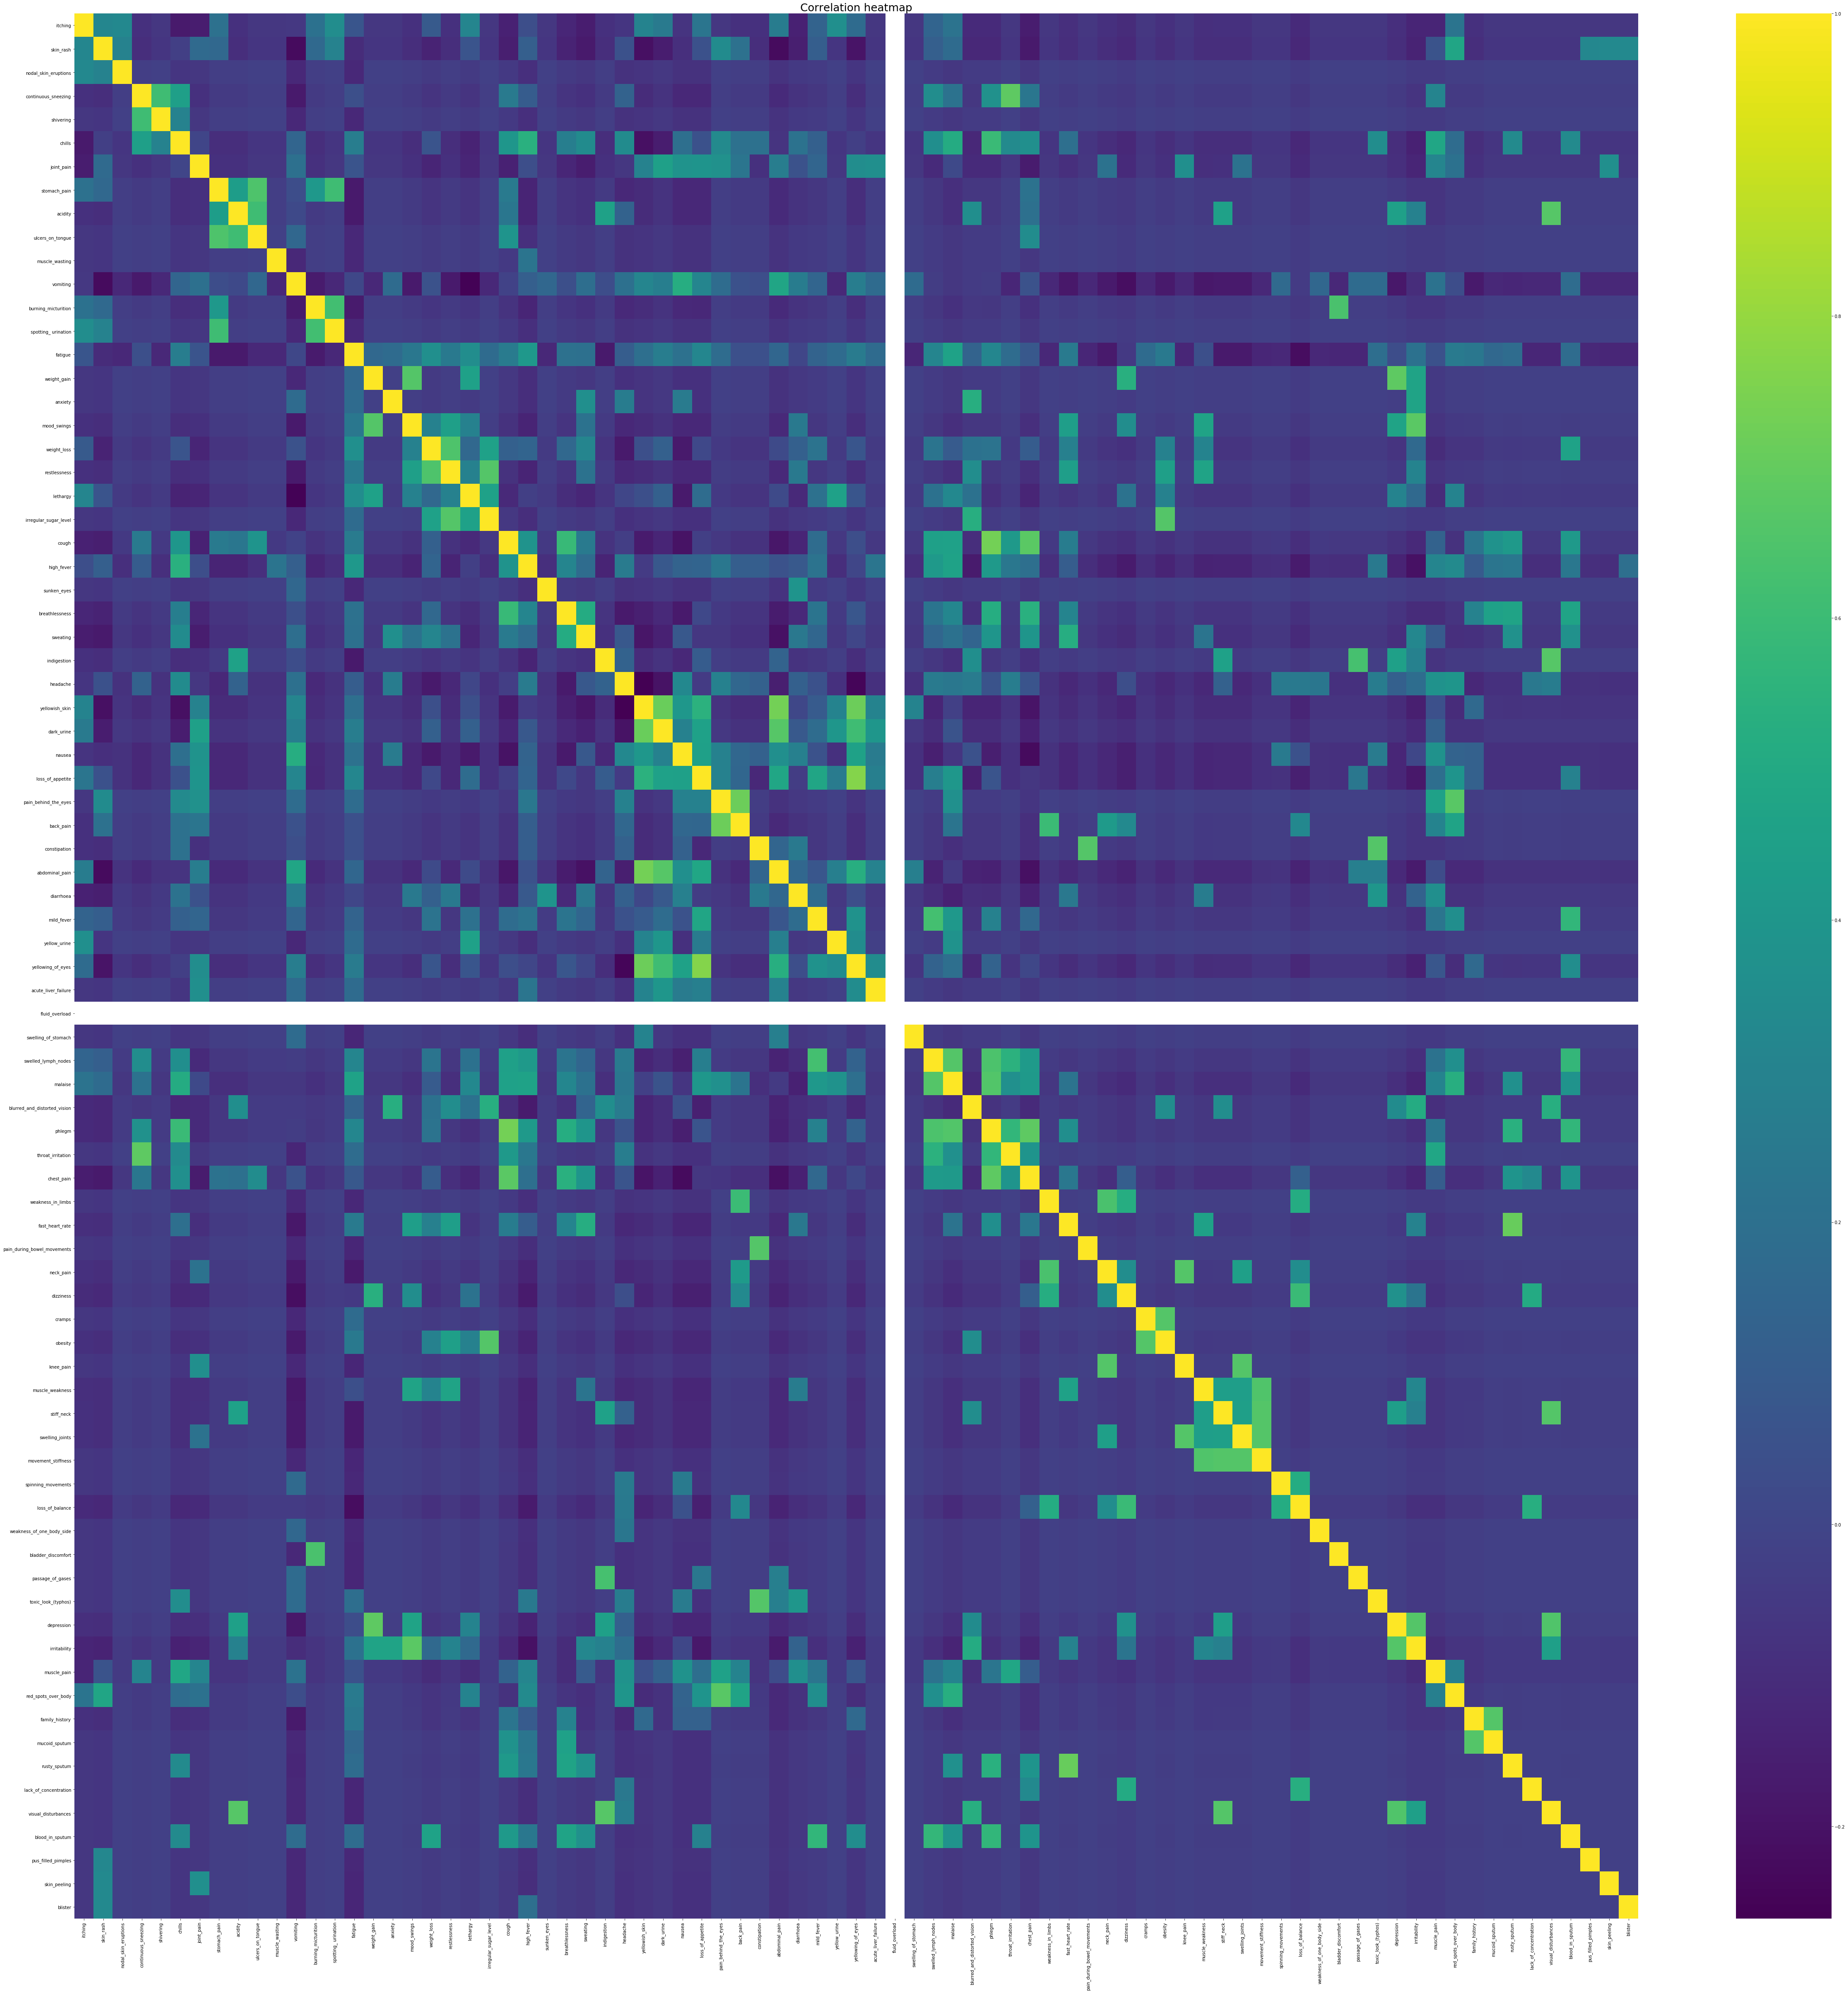

In [12]:
#Και εδώ το παρουσιάζουμε σε heatmap ξανά

plt.figure(figsize=(in_features,in_features))
sns.heatmap(train_df.corr(), cmap='viridis')
plt.title('Correlation heatmap',size=25)
plt.show()

In [13]:
#Χωρίζουμε το dataset σε x_reg και y_reg, δηλαδή στο κομμάτι που έχει όλα τα χαρακτηριστικά και στο κομμάτι που έχει 
#μόνο τις προγνώσεις, αυτό που θέλουμε να προβλέψουμε δηλαδή χρησιμοπιώντας το x_reg 

regression_df = train_df.drop(['prognosis'], axis=1)
x_reg = regression_df
y_reg = train_df['prognosis']

In [14]:
#Χωρίζουμε τα x_reg και y_reg σε x_train, x_test, y_train και y_test για να χρησιμοποιηθούνε στην εκμάθηση των μοντέλων 
#προβλέψεων και για να βρούμε τι ποσοστό επιτυχίας είχε η αντίστοιχη προβλεψη

x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size=0.2)

In [15]:
#Χρησιμοποιώντας την κωδικοποίηση που δείξαμε πιο πάνω, αλλάζουμε το y_train και y_test για να απαλειφθούν τα ονόματα

y_train = y_train.astype('category')
y_train = y_train.cat.codes

y_train

1774    32
4522     7
4693    40
1715    12
1591     0
4559    17
3376    28
3679    39
3539    32
4632    27
2340    18
4381     5
4649     8
449      9
1247     4
995     11
3684     5
2111     1
2493    25
2590    12
3438     5
4100    15
2585    16
1573    31
4589    38
1565    25
3521     0
4372    10
4903     3
1967    24
        ..
3997    19
288     13
3663    28
3604     2
3246    12
3901     1
410     15
1919    34
3583     8
3903    17
2904    31
3105    39
975     29
1174     5
327     24
2067     4
2337    13
1566    25
726     26
193     40
4401    28
4893    28
2296     3
2665    15
109     23
2120    12
1413    37
3988    30
2124    12
1518    13
Length: 3936, dtype: int8

In [16]:
y_test = y_test.astype('category')
y_test = y_test.cat.codes

y_test

3072    38
982      8
1785    28
3456     7
3995    37
2748     4
2309    36
2487    34
246      3
3703    32
400     27
4750     5
2638    28
1035    20
2033    35
416     15
1049    21
3612    14
2046    27
2324    34
2878    17
3809     2
3659    23
3392    39
1740    23
2801    32
1432    19
3868    28
4346    15
3784     7
        ..
3304     3
4855    11
4475     1
2025    38
4565    28
1291     1
1140    24
1721    17
3369    12
3632     3
2090    14
3846    25
4622    39
667     36
4152    30
2718     7
1658     4
4890    30
3818    33
177     11
2082     9
4020    16
2621    38
2656    24
317     26
1706     1
63       1
3821    17
645     22
4160    40
Length: 984, dtype: int8

### Από εδώ και κάτω χρησιμοποιούμε πολλούς αλγορίθμους παλινδρόμησης και κατηγοριοποίησης χρησιμοποιώντας τις αντίστοιχες συναρτήσεις από την sklearn βιβλιοθήκη και δείχνοντας κάθε φορά τις τιμές που πρόβλεψε, το ποσοστό επιτυχίας αυτών των προβλέψεων και μερικές μετρήσεις.

# Regression Models

## Linear Regression

In [17]:
model_lir = sm.OLS(np.asarray(y_train), np.asarray(x_train)).fit()
predictions = model_lir.predict(x_test) 
 
df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
3072,38,39.010846
982,8,3.279609
1785,28,21.751744
3456,7,7.438929
3995,37,38.385428
2748,4,4.300614
2309,36,33.921731
2487,34,34.550683
246,3,3.489781
3703,32,32.847315


In [18]:
print_model = model_lir.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                -701.970
Model:                            OLS   Adj. R-squared (uncentered):           -716.555
Method:                 Least Squares   F-statistic:                             -48.13
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                        1.00
Time:                        20:32:23   Log-Likelihood:                         -10219.
No. Observations:                3936   AIC:                                  2.060e+04
Df Residuals:                    3856   BIC:                                  2.110e+04
Df Model:                          80                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

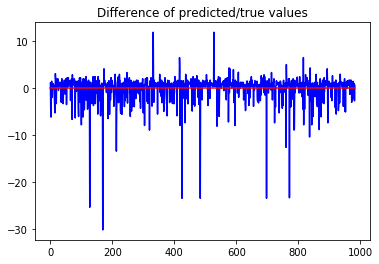

In [19]:
plt.plot(range(0,len(x_test.axes[0])), predictions - y_test, '-b', range(0,len(x_test.axes[0])), np.zeros(len(x_test.axes[0])), '-r')
plt.title("Difference of predicted/true values")
plt.show()

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

predictions = predictions.round()

successes = 0

for i in range(0,len(y_test)):
  if y_test.iloc[i] == predictions.iloc[i]:
    successes = successes + 1

print('Hit rate = ', successes * 100 / len(y_test), '%')

Mean Absolute Error: 1.7128905362655427
Mean Squared Error: 9.13967831050122
Root Mean Squared Error: 3.023190088383663
Hit rate =  23.78048780487805 %


## Logistic Regression

In [21]:
model_lor = LogisticRegression()
model_lor.fit(x_train, y_train)
predictions = model_lor.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
3072,38,38
982,8,8
1785,28,28
3456,7,7
3995,37,37
2748,4,4
2309,36,36
2487,34,34
246,3,3
3703,32,32


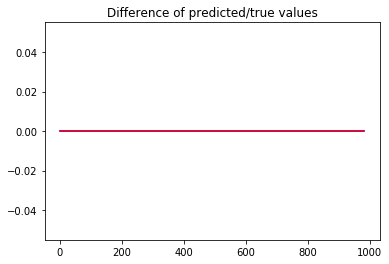

In [22]:
plt.plot(range(0,len(x_test.axes[0])), predictions - y_test, '-b', range(0,len(x_test.axes[0])), np.zeros(len(x_test.axes[0])), '-r')
plt.title("Difference of predicted/true values")
plt.show()

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

predictions = predictions.round()

errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Accuracy: 100.0 %.


## Decision Tree Regression

In [24]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(x_train, y_train)
predictions = model_dtr.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
3072,38,38.0
982,8,8.0
1785,28,28.0
3456,7,7.0
3995,37,37.0
2748,4,4.0
2309,36,36.0
2487,34,34.0
246,3,3.0
3703,32,32.0


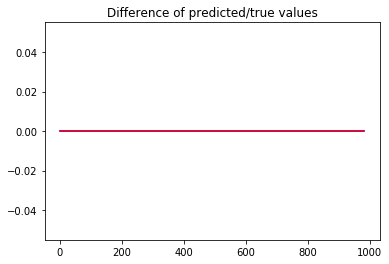

In [25]:
plt.plot(range(0,len(x_test.axes[0])), predictions - y_test, '-b', range(0,len(x_test.axes[0])), np.zeros(len(x_test.axes[0])), '-r')
plt.title("Difference of predicted/true values")
plt.show()

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

predictions = predictions.round()

errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Accuracy: 100.0 %.


## Random Forest Regression

In [27]:
model_rfr = RandomForestRegressor()
model_rfr.fit(x_train, y_train)
predictions = model_rfr.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
3072,38,38.00
982,8,8.00
1785,28,28.00
3456,7,7.00
3995,37,37.00
2748,4,4.00
2309,36,35.08
2487,34,34.00
246,3,3.00
3703,32,32.00


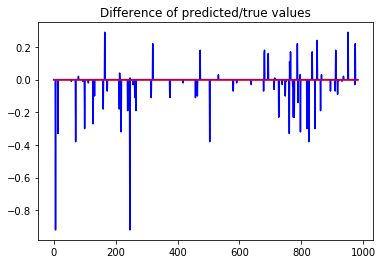

In [28]:
plt.plot(range(0,len(x_test.axes[0])), predictions - y_test, '-b', range(0,len(x_test.axes[0])), np.zeros(len(x_test.axes[0])), '-r')
plt.title("Difference of predicted/true values")
plt.show()

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

predictions = predictions.round()

errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.012337398373983772
Mean Squared Error: 0.004080284552845544
Root Mean Squared Error: 0.06387710507564931
Accuracy: 99.99 %.


## SVM Regression

In [30]:
model_svmr = SVR(kernel='rbf')
model_svmr.fit(x_train, y_train)

predictions = model_svmr.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
3072,38,37.899808
982,8,9.981236
1785,28,23.940316
3456,7,6.899678
3995,37,37.100380
2748,4,4.100386
2309,36,33.847861
2487,34,34.099882
246,3,3.100187
3703,32,31.900348


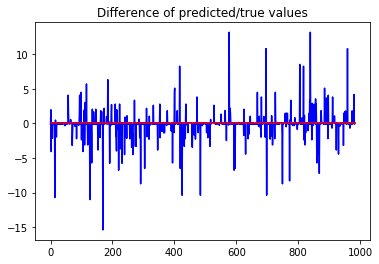

In [31]:
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values");
plt.show()

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

predictions = predictions.round()

successes = 0

for i in range(0,len(y_test)):
  if y_test.iloc[i] == predictions[i]:
    successes = successes + 1

print('Hit rate = ', successes * 100 / len(y_test), '%')

Mean Absolute Error: 0.7051419931430148
Mean Squared Error: 3.416143790141284
Root Mean Squared Error: 1.8482813070908022
Hit rate =  80.89430894308943 %


## K-Nearest-Neighbors Regression

In [33]:
model_knnr = KNeighborsRegressor(n_neighbors=7)
model_knnr.fit(x_train, y_train)

predictions = model_knnr.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
3072,38,38.0
982,8,8.0
1785,28,28.0
3456,7,7.0
3995,37,37.0
2748,4,4.0
2309,36,36.0
2487,34,34.0
246,3,3.0
3703,32,32.0


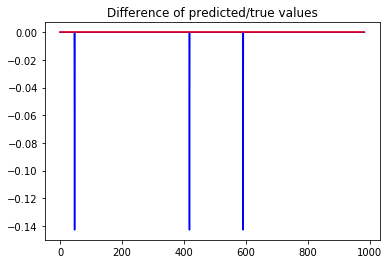

In [34]:
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values");
plt.show()

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

predictions = predictions.round()

errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0004355400696864096
Mean Squared Error: 6.222000995520116e-05
Root Mean Squared Error: 0.007887966148203297
Accuracy: 100.0 %.


# Classification Models

## Naive-Bayes Classification

In [36]:
model_nbc = MultinomialNB().fit(x_train, y_train)

predictions = model_nbc.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
3072,38,38
982,8,8
1785,28,28
3456,7,7
3995,37,37
2748,4,4
2309,36,36
2487,34,34
246,3,3
3703,32,32


In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='micro'))
print("Recall:",metrics.recall_score(y_test, predictions, average='micro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## Decision Tree Classification

In [38]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train,y_train)

predictions = model_dtc.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
3072,38,38
982,8,8
1785,28,28
3456,7,7
3995,37,37
2748,4,4
2309,36,36
2487,34,34
246,3,3
3703,32,32


In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='micro'))
print("Recall:",metrics.recall_score(y_test, predictions, average='micro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## Random Forest Classification

In [40]:
model_rfc = RandomForestClassifier(n_estimators=100)
model_rfc.fit(x_train,y_train)

predictions = model_rfc.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
3072,38,38
982,8,8
1785,28,28
3456,7,7
3995,37,37
2748,4,4
2309,36,36
2487,34,34
246,3,3
3703,32,32


In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='micro'))
print("Recall:",metrics.recall_score(y_test, predictions, average='micro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## SVM Classification

In [42]:
model_svmc = svm.SVC(kernel='linear')
model_svmc.fit(x_train, y_train)

predictions = model_svmc.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
3072,38,38
982,8,8
1785,28,28
3456,7,7
3995,37,37
2748,4,4
2309,36,36
2487,34,34
246,3,3
3703,32,32


In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='micro'))
print("Recall:",metrics.recall_score(y_test, predictions, average='micro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## K-Nearest-Neighbors Classification

In [44]:
model_knnc = KNeighborsClassifier(n_neighbors=7)
model_knnc.fit(x_train,y_train)

predicted= model_knnc.predict(x_test) 

df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
3072,38,38
982,8,8
1785,28,28
3456,7,7
3995,37,37
2748,4,4
2309,36,36
2487,34,34
246,3,3
3703,32,32


In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='micro'))
print("Recall:",metrics.recall_score(y_test, predictions, average='micro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


### Εδώ φτάσαμε στο τέλος όλων των αλγορίθμων και ήρθε η ώρα να δούμε πως μπορούμε να κάνουμε μία πρόβλεψη για το πρόβλημα υγείας που έχει ένας τυχαίος άνθρωπος με τα συμπτώματα του.

### Πιο συγκεκριμένα δημιουργούμε ένα καινούριο dataframe το οποίο γεμίζει ο ίδιος ο ασθενής απαντώντας σε μερικές ερωτήσεις. Έπειτα γίνονται οι προβλέψεις από όλα τα προαναφερθέντα μοντέλα και βγαίνουν οι τελικές προγνώσεις από τον κάθε αλγόριθμο.

In [46]:
training_inputs = train_df.columns[1:]

symptom_list = training_inputs.values.tolist()

print("All the available symptoms are:\n\n", sorted(symptom_list))

answer = str("No")

while answer == "No":
    print("\nPlease type all the symptoms you are experiencing with correct spelling, using the lower dash(_) when needed, separating \neach symptom with a comma(,), without using spaces and press the key 'enter', e.g. skin_rash,loss_of_balance,knee_pain\n")
    symptoms = input()
    symptoms = symptoms.split(',')
    
    flag = 0

    for i in range(0, len(symptoms)):
        for j in range(0, len(x_reg.columns)):
                if symptoms[i] == x_reg.columns[j]:
                    flag = flag + 1

    if flag != len(symptoms):
        print("\nOne or more of the symptoms were typed incorrectly, please try again.")
        continue
    
    print("\nIf you made any mistake or want to make any changes you can type 'No', press the key 'enter' and try again, otherwise type \n'Yes', press the key 'enter' and see the results.\n")
    answer = input()
    
    while answer not in ("Yes", "No"):
        print("\nYou gave an answer different from 'Yes' and 'No', try again.\n")
        print("If you want to make any changes you can type 'No', press the key 'enter' and try again, otherwise type \n'Yes', press the key 'enter' and see the results.\n")
        answer = input()

test_df = x_reg.drop(x_reg.index[1:])

for i in range(0, len(test_df.columns)):
    test_df.iloc[0][i] = 0
    
for i in range(0, len(test_df.columns)):
    for j in range(0, len(symptoms)):
        if symptoms[j] == test_df.columns[i]:
            test_df.iloc[0][i] = 1
            
methods = ['Linear Regression', 'Logistic Regression', 'Decision Tree Regression', 'Random Forest Regression', 'SVM Regression',
           'K-Nearest-Neighbors Regression', 'Naive Bayes Classification','Decision Tree Classification', 
           'Random Forest Classification', 'SVM Classification', 'K-Nearest-Neighbors Classification'] 

lr = model_lir.predict(test_df)

predictions = [lr[0].round(), model_lor.predict(test_df).round(), model_dtr.predict(test_df).round(), 
               model_rfr.predict(test_df).round(), model_svmr.predict(test_df).round(), model_knnr.predict(test_df).round(), 
               model_nbc.predict(test_df).round(), model_dtc.predict(test_df).round(), model_rfc.predict(test_df).round(), 
               model_svmc.predict(test_df).round(), model_knnc.predict(test_df).round()]

predictions_df = pd.DataFrame({'Methods': methods, 'Predicted Prognosis': predictions})

predictions_df.iloc[0][1] = labels[predictions_df.iloc[0][1]]

for i in range(1, len(predictions_df.axes[0])):
    predictions_df.iloc[i][1] = labels[predictions_df.iloc[i][1][0]]
            
predictions_df

All the available symptoms are:

 ['abdominal_pain', 'acidity', 'acute_liver_failure', 'anxiety', 'back_pain', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'blurred_and_distorted_vision', 'breathlessness', 'burning_micturition', 'chest_pain', 'chills', 'constipation', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'depression', 'diarrhoea', 'dizziness', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'headache', 'high_fever', 'indigestion', 'irregular_sugar_level', 'irritability', 'itching', 'joint_pain', 'knee_pain', 'lack_of_concentration', 'lethargy', 'loss_of_appetite', 'loss_of_balance', 'malaise', 'mild_fever', 'mood_swings', 'movement_stiffness', 'mucoid_sputum', 'muscle_pain', 'muscle_wasting', 'muscle_weakness', 'nausea', 'neck_pain', 'nodal_skin_eruptions', 'obesity', 'pain_behind_the_eyes', 'pain_during_bowel_movements', 'passage_of_gases', 'phlegm', 'pus_filled_pimples', 'red_spots_over_body', 'restlessness', 'rusty_sputum', 'shivering', 's

,Methods,Predicted Prognosis
0,Linear Regression,AIDS
1,Logistic Regression,Fungal infection
2,Decision Tree Regression,Fungal infection
3,Random Forest Regression,Fungal infection
4,SVM Regression,Drug Reaction
5,K-Nearest-Neighbors Regression,Fungal infection
6,Naive Bayes Classification,Fungal infection
7,Decision Tree Classification,Cervical spondylosis
8,Random Forest Classification,Fungal infection
9,SVM Classification,Fungal infection
